# Propagation in shalow water


Jupiter notebook specific imports

In [ ]:
import os
os.chdir('../../../')
import warnings
warnings.filterwarnings('ignore')

PyWaveProp imports

In [2]:
from uwa.source import GaussSource
from uwa.environment import UnderwaterEnvironment, Bathymetry
from uwa.sspade import UWASSpadeComputationalParams, uwa_ss_pade
from uwa.vis import AcousticPressureFieldVisualiser2d

Preparing environment

In [3]:
max_range_m = 3000
env = UnderwaterEnvironment(
    sound_speed_profile_m_s=lambda x, z: 1500 + z*0,
    bottom_profile=Bathymetry(
        ranges_m=[0, max_range_m],
        depths_m=[300, 300]),
    bottom_sound_speed_m_s = 1700,
    bottom_density_g_cm = 1.5,
    bottom_attenuation_dm_lambda = 0.01
)

Preparing transmitting antenna

In [4]:
src = GaussSource(
    freq_hz=1000,
    depth_m=100,
    beam_width_deg=1,
    eval_angle_deg=-30,
    multiplier=5
)

Calculating the acoustics pressure field

In [5]:
params = UWASSpadeComputationalParams(
    max_range_m=max_range_m,
    max_depth_m=500,
    dx_m=1, # output grid steps affects only on the resulting field, NOT the computational grid
    dz_m=1,
)

In [6]:
field = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)

Visualising the results

Two dimensional distribution of the field amplitude

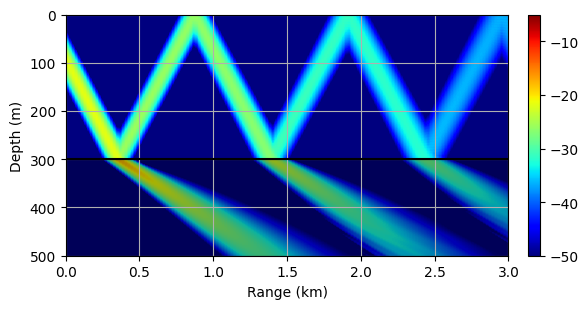

In [7]:
vis = AcousticPressureFieldVisualiser2d(field=field, env=env)
vis.plot2d(min_val=-50, max_val=-5, grid=True, show_terrain=True).show()

In [8]:
src = GaussSource(
    freq_hz=200,
    depth_m=150,
    beam_width_deg=10,
    eval_angle_deg=10,
    multiplier=5
)

In [9]:
field = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)

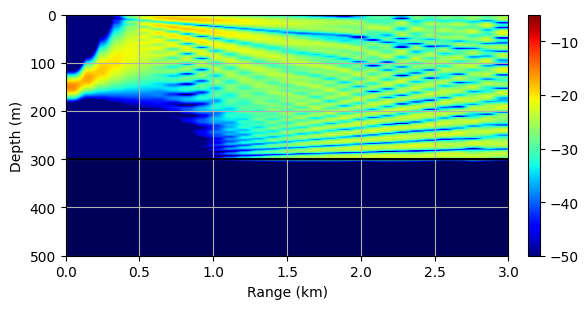

In [10]:
vis = AcousticPressureFieldVisualiser2d(field=field, env=env)
vis.plot2d(-50, -5, grid=True, show_terrain=True).show()

In [11]:
env = UnderwaterEnvironment(
    sound_speed_profile_m_s=lambda x, z: 1500 + z*0,
    bottom_profile=Bathymetry(
        ranges_m=[0, max_range_m],
        depths_m=[400, 0]),
    bottom_sound_speed_m_s = 1700,
    bottom_density_g_cm = 1.5,
    bottom_attenuation_dm_lambda = 0.05
)

In [12]:
field = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)

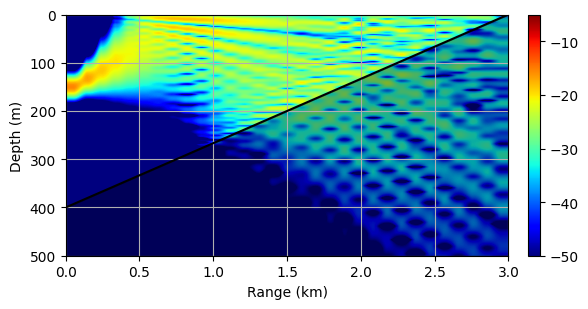

In [13]:
vis = AcousticPressureFieldVisualiser2d(field=field, env=env)
plt = vis.plot2d(-50, -5, grid=True, show_terrain=True)
plt.show()